In [230]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [231]:
sig = lambda x:1/(1 + np.exp(-x)) #activation function 
dsig = lambda x:(np.exp(-x))/(1+np.exp(-x))**2 #activation function derivative 

In [232]:
def N(w0,w1,b0,b1,x,y): #neural network
    inputs = np.array([x,y])
    input_hidden = sig(np.dot(w0,inputs)+b0)
    hidden_output = np.dot(input_hidden,w1) + b1
    return hidden_output

In [233]:
def dNdx(w0,w1,b0,b1,x,y): #neural network derivative with respect to x
    alpha = 1e-3 #term that helps find delta w where delta w = alpha*w
    return (N(w0,w1,b0,b1,x+alpha*x,y)-N(w0,w1,b0,b1,x-alpha*x,y))/(2*alpha)

In [234]:
def dNdy(w0,w1,b0,b1,x,y): #neural network derivative with respect to y
    alpha = 1e-3 #term that helps find delta w where delta w = alpha*w
    return (N(w0,w1,b0,b1,x,y+alpha*y)-N(w0,w1,b0,b1,x,y-alpha*y))/(2*alpha)

In [235]:
def A(x,y): #Calculated using boundary conditions
    return (1-x)*f0(y) + x*f1(y) + (1-y)*(g0(x) - ((1 - x)*g0(0) + x*g0(1))) + y*(g1(x) - ((1 - x)*g1(0) + x*g1(1)))

In [236]:
def L(w0,w1,b0,b1,x,y): #cost function
    err_sum = 0 #sum of cost for each input
    for y_i in y:
        for x_i in x:
            net_value = N(w0,w1,b0,b1,x_i,y_i)
            dxnet_value = dNdx(w0,w1,b0,b1,x_i,y_i)
            dynet_value = dNdy(w0,w1,b0,b1,x_i,y_i)
            dnet_value = dxnet_value + dynet_value
            psi = A(x_i,y_i)+x_i*(1-x_i)*y_i*(1-y_i)*net_value
            err_sum += (dnet_value - f_pde(x_i,y_i,psi))**2
    return np.mean(np.sqrt(err_sum))

In [237]:
def gradw0(w0,w1,b0,b1,x,y): #gradient of the cost function
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    dLdw0 = (L(w0+alpha*w0,w1,b0,b1,x,y) - L(w0-alpha*w0,w1,b0,b1,x,y))/(2*alpha*w0)
    return dLdw0

def gradw1(w0,w1,b0,b1,x,y):
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    dLdw1 = (L(w0,w1+alpha*w1,b0,b1,x,y) - L(w0,w1-alpha*w1,b0,b1,x,y))/(2*alpha*w1)
    return dLdw1

def gradb0(w0,w1,b0,b1,x,y):
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    dLdb0 = (L(w0,w1,b0+alpha*b0,b1,x,y) - L(w0,w1,b0-alpha*b0,b1,x,y))/(2*alpha*b0)
    return dLdb0

def gradb1(w0,w1,b0,b1,x,y):
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    dLdb1 = (L(w0,w1,b0,b1+alpha*b1,x,y) - L(w0,w1,b0,b1-alpha*b1,x,y))/(2*alpha*b1)    
    return dLdb1

In [238]:
def gradient_descent(w0,w1,b0,b1,x,y,learning_rate,n_iter): #gradient descent algorithm
    s0 = w0
    s1 = w1
    s2 = b0
    s3 = b1
    for _ in range(n_iter):
        diffw0 = np.multiply(gradw0(s0,s1,s2,s3,x,y),-learning_rate) #find out how much we need to change
        diffw1 = np.multiply(gradw1(s0,s1,s2,s3,x,y),-learning_rate) #find out how much we need to change each weight
        diffb0 = np.multiply(gradb0(s0,s1,s2,s3,x,y),-learning_rate)
        diffb1 = np.multiply(gradb1(s0,s1,s2,s3,x,y),-learning_rate)
        s0 = np.add(s0,diffw0) #change w0
        s1 = np.add(s1,diffw1) #change w1
        s2 = np.add(s2,diffb0) #change b0
        s3 = np.add(s3,diffb1) #change b1
        #print("Loss: " + str(L(s0,s1,s2,s3,t))) #calculate the new value of the loss
    return s0,s1,s2,s3,L(s0,s1,s2,s3,x,y)

In [239]:
def f_pde(x,y,psi): #PDE 1
    return np.exp(-1*x) * (x-2+y**3+6*y)

In [240]:
#boundary condition functions PDE 1 (dirichlet boundary condition)
def f0(y): #BC at (0,y)
    return y**3

def f1(y): #BC at (ny,y) 
    return (1 + y**3)*np.exp(-1)

def g0(x): #BC at (x,0)
    return x * np.exp(-1*x)

def g1(x): #BC at (x,nx)
    return (x + 1) * np.exp(-1*x)

In [241]:
def pde_sol(x,y): #PDE 1 solution
    return np.exp(-1*x)*(x+y**3)

In [242]:
#number of nodes in each layer 
n_input = 2
n_hidden = 2
n_output = 1

#Number of points on (x,y) grid space
nx = 10
ny = 10

#values for training
learning_rate = 0.001
n_iter = 100
x_min = 0
x_max = 1
x = np.linspace(x_min,x_max,nx)
y_min = 0
y_max = 1
y = np.linspace(y_min,y_max,ny)

#1 - create the weight and bias vectors
w0 = np.random.randn(n_input,n_hidden)
w1 = np.random.randn(n_hidden,n_output)
b0 = np.random.randn(n_hidden)
b1 = np.random.randn(n_output)

In [243]:
values = gradient_descent(w0,w1,b0,b1,x,y,learning_rate,n_iter)
w0 = values[0]
w1 = values[1]
b0 = values[2]
b1 = values[3]
print(values[4])

18.159376914435935


In [244]:
#plot to test results

num_p = 20 #Number of points in interval

x = np.linspace(0,1,num_p) #add points in the interval to test solution
y = np.linspace(0,1,num_p) #add points in the interval to test solution

psi = [] #holds function approximation
sol = [] #hold function

for y_i in y:
    for x_i in x:
        neural_net_value = N(w0,w1,b0,b1,x_i,y_i) #calculate point in neural network
        psi_value = (A(x_i,y_i)+x_i*(1-x_i)*y_i*(1-y_i)*neural_net_value)[0]
        psi.append(psi_value) #calculate and add the point in function approximation
        sol.append(pde_sol(x_i,y_i))

In [245]:
mesh_x = []
mesh_y = []
for add in range (0,len(y)):
    for add2 in range(0,len(x)):
        mesh_x.append(y[add2])
        mesh_y.append(y[add])

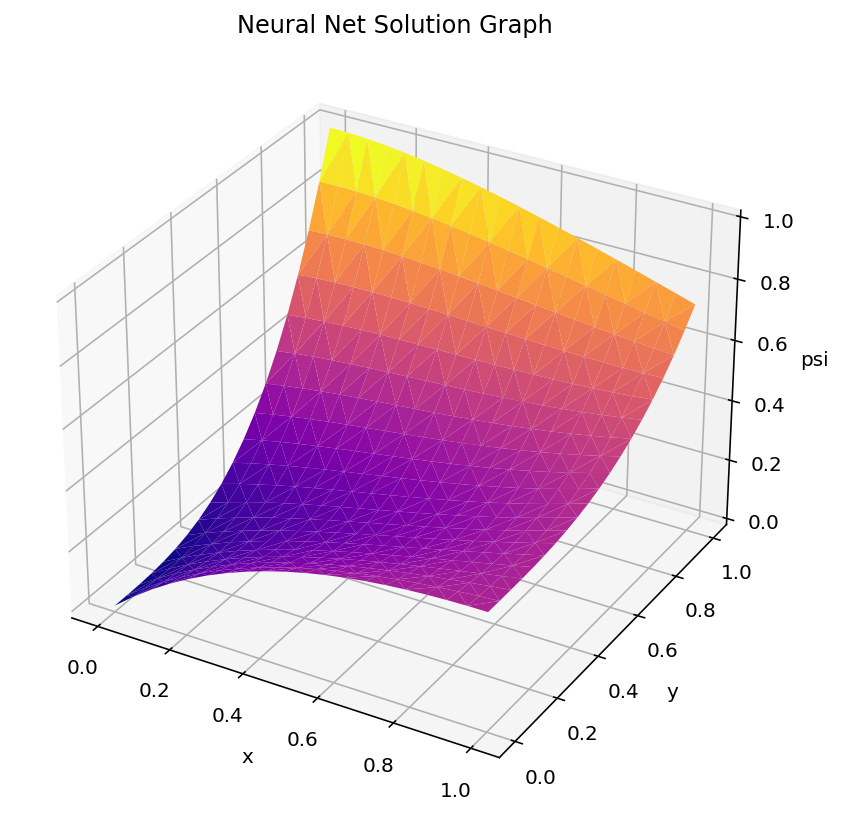

In [277]:
#Plot the neural network solution on a 3d graph
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Neural Net Solution Graph")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('psi')
ax.plot_trisurf(mesh_x,mesh_y,psi,cmap=plt.cm.plasma)

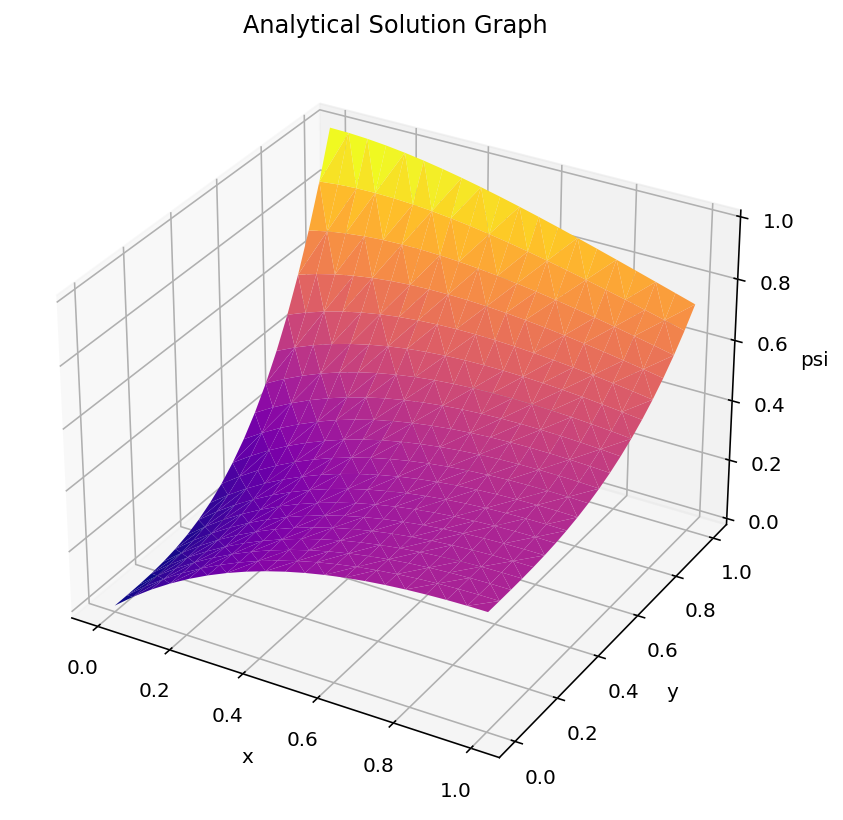

In [278]:
#Plot the solution on a 3d graph
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Analytical Solution Graph")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('psi')
ax.plot_trisurf(mesh_x,mesh_y,sol,cmap=plt.cm.plasma)

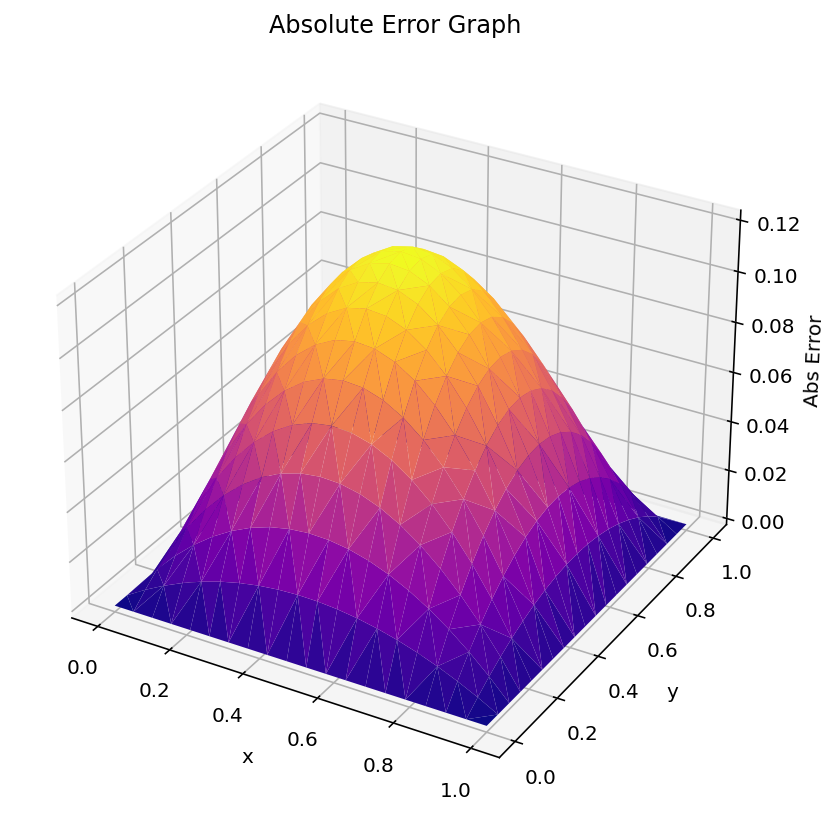

In [281]:
difference = []

zip_object = zip(sol, psi)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Absolute Error Graph")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Abs Error')
ax.plot_trisurf(mesh_x,mesh_y,difference,cmap=plt.cm.plasma)